In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv("../raw/requirements.csv")



# get columns and drop text-based ones
columns = list(df.columns)
df = df.drop(columns = [columns[0],
                        columns[1],
                        columns[2],
                        columns[3],
                        columns[5],
                        columns[7],
                        columns[9],
                        columns[11],
                        columns[13],
                        columns[15],
                        columns[17],
                        columns[19],
                        columns[21]])

x = ["Feature {}".format(i+1) for i in range(9)]

# count the columns and get the mean
cols = list(df.sum(axis = 0, skipna=True))
mean = [i / len(df) for i in cols]

means = []
stds = []
for i in range(len(df.columns)):
    means.append(df[df.columns[i]].mean(axis=0))
    stds.append(df[df.columns[i]].std(axis=0))



features = ["Notifications to take\n medication",
                 "Keeping track of stock",
                 "Reminders for\n low stock",
                 "Integration with\n Google Calendar",
                 "Different profiles for medication",
                 "Scanning barcodes for adding medication",
                 "Selecting specific medications to synchronise with Google Calendar",
                 "Login via multiple devices",
                 "A log of medication"]



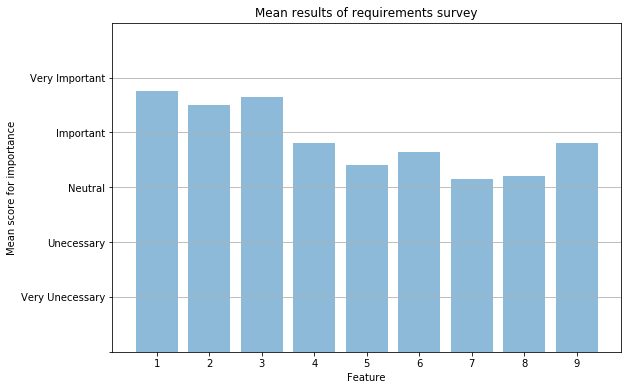

In [53]:
x_pos = np.arange(len(df.columns))


fig, ax = plt.subplots()

ax.bar(x_pos, means, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean score for importance')
ax.set_xlabel("Feature")

ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos + 1)

ax.set_yticks(np.arange(6))
ax.set_yticklabels(["", "Very Unecessary", "Unecessary", "Neutral", "Important", "Very Important"])

ax.set_title('Mean results of requirements survey')
ax.yaxis.grid(True)

axes = plt.gca()
axes.set_ylim([0,6])

plt.tight_layout()
fig.set_size_inches(10, 6, forward=True)
plt.savefig('medapprequirements.png')
plt.show()




In [ ]:

features = ["Notifications to take medication",
                 "Keeping track of stock",
                 "Reminders for low stock",
                 "Integration with Google Calendar",
                 "Different profiles for medication",
                 "Scanning barcodes for adding medication",
                 "Selecting specific medications to synchronise with Google Calendar",
                 "Login via multiple devices",
                 "A log of medication"]


conv = {"Strongly disagree":1,
       "Disagree": 2,
       "Neutral":3,
       "Agree":4,
       "Strongly agree": 5}
conv = {v: k for k, v in conv.items()}


o = []
for name, values in df.iteritems():
    count = {"Strongly disagree":0,
       "Disagree": 0,
       "Neutral":0,
       "Agree":0,
       "Strongly agree": 0}
    for i in values:
        v = conv[i]
        count[v] += 1
    o.append(count)


data = []        
for feature, results in zip(features, o):
    l = []
    l.append(feature)
    for i,v in results.items():
        l.append(v)
    data.append(l)

    
df = pd.DataFrame(data, columns = ["question", "strongly disagree", "disagree", "neutral", "agree", "strongly agree"])

Index(['question', 'strongly disagree', 'disagree', 'neutral', 'agree',
       'strongly agree'],
      dtype='object')


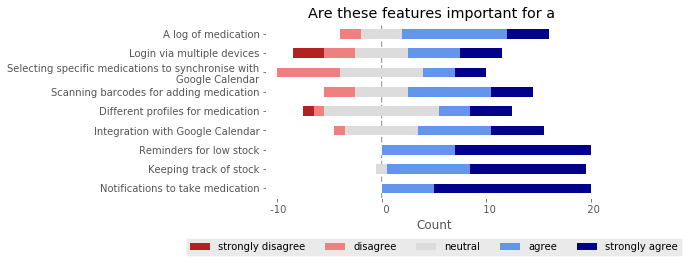

In [170]:
'''
import os
import matplotlib.pyplot as plt
import pandas as pd
import textwrap
import numpy as np

print(df.columns)

# Some questions are rather long. To nicely display them in the figure they need to be wrapped.
wrapper = textwrap.TextWrapper(width=50)
df['question'] = df['question'].apply(lambda x: wrapper.fill(x))

# define likert colors, since the default colors look terrible.
# Note that the first color is assigned to the 'invisible' column and is therefore white
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']

# set the questions as the index for easier plotting later on
# (alternatively one could explicitly state in the plotting call which column to use for labeling)
df = df.set_index('question')

# find out the middle value
# Note that this code is non-generic, and depends on the particular anchor points for the scale
middles = df[["strongly disagree", "disagree"]].sum(axis=1) + df["neutral"]*.5

# define some margin (1.1) for the left hand side of the plot
longest = middles.max()*1.1

# insert the invisible column
df.insert(0, '', (middles - longest).abs())

# create the horizontal bar chart, using the subset 'all'
ax = df.dropna(axis=1).plot.barh(
    stacked=True, 
    color=likert_colors, 
    edgecolor='none'
)

# plot a vertical dashed line at 0
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
# put this line at the background
z.set_zorder(-1)

# define some margin (1.05) for the right hand side of the plot
complete_longest = int(df.sum(axis=1).max()*1.05) 
plt.xlim(0, complete_longest)

# create custom tick positions and labels
# the value of 4000 is particularly chosen for this case
xvalues = [longest-10+10*i for i in range(4)]
xlabels = ['{:4.0f}'.format(x-longest) for x in xvalues]
plt.xticks(xvalues, xlabels)

# Shrink current axis's height by 10% on the bottom to make room for the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.8])
ax.set_facecolor("white")
# create the legend
handler, label = ax.get_legend_handles_labels()
ax.legend(
    handler, 
    label, 
    loc='upper center', 
    bbox_to_anchor=(.5, -0.2), 
    ncol=5, 
    edgecolor='white'
)

# set labels and title

plt.xlabel('Count')
plt.ylabel('')
plt.title('Are these features important for a ')
plt.show()
'''